In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

In [4]:
np.random.seed(1000)
%matplotlib inline

In [6]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2
reg = np.polyfit(x, y, 1)

Text(0, 0.5, 'y')

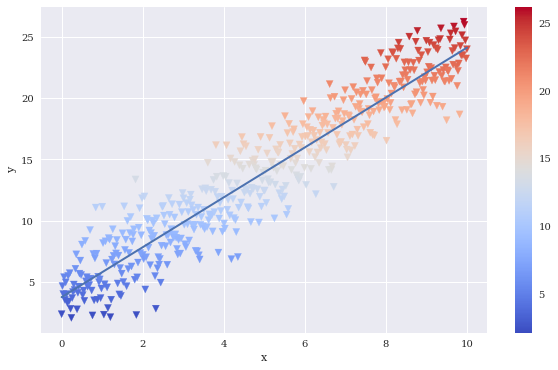

In [7]:
plt.figure(figsize = (10,6))
plt.scatter(x, y, c = y, marker = 'v', cmap = 'coolwarm')
plt.plot(x, reg[1] + reg[0]*x, lw = 2.0)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

In [10]:
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
c:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
  return f(*args, **kwds)


In [19]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu = 0, sd = 20)
    beta = pm.Normal('beta', mu = 0, sd = 10)
    sigma = pm.Uniform('sigma', lower = 0, upper = 10)
    y_est = alpha + beta * x
    likelihood = pm.Normal('y', mu = y_est, sd = sigma, observed = y)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(100, tune = 1000, start = start, progressbar = True)

c:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated Parameter start. (renamed to `initvals` in PyMC v4.0.0) -- Deprecated since v3.11.5.
  if __name__ == '__main__':
c:\ProgramData\Anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 617 seconds.
The acceptance probability does not match the target. It is 0.8868834935117618, but should be close to 0.8. Try to increase the number of tuning steps.


In [20]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
c:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.776,0.180,3.418,4.085,0.014,0.010,167.0,161.0,1.01
beta,2.034,0.031,1.976,2.089,0.002,0.002,164.0,157.0,1.01
sigma,2.007,0.064,1.882,2.119,0.004,0.003,238.0,263.0,1.02


In [39]:
len(trace)

100

SyntaxError: invalid syntax (<ipython-input-26-d367a886afcd>, line 2)

In [51]:
import arviz as az
from arviz.utils import conditional_jit, Numba
from arviz.stats.diagnostics import ks_summary
az.style.use("arviz-darkgrid")

Got error No model on context stack. trying to find log_likelihood in translation.
c:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


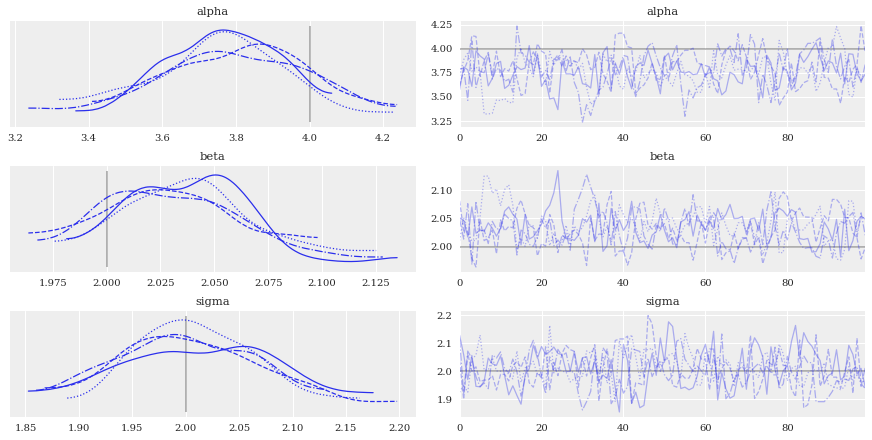

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
Numba.disable_numba()
#fig, axes = plt.subplots(3,2, figsize=(12,6))

az.plot_trace(trace, var_names = ["alpha", "beta", "sigma"],lines=(('alpha', {}, 4),('beta', {}, 2),('sigma', {}, 2)))
plt.show()